In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv("country_wise_latest.csv")

In [3]:
dataframe.shape

(187, 15)

In [4]:
dataframe.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [8]:
dataframe.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [32]:
print("Unique Values:\n", dataframe.nunique())

Unique Values:
 Country/Region            187
Confirmed                 184
Deaths                    150
Recovered                 178
Active                    173
New cases                 122
New deaths                 38
New recovered             103
Deaths / 100 Cases        145
Recovered / 100 Cases     177
Deaths / 100 Recovered    155
Confirmed last week       183
1 week change             162
1 week % increase         169
WHO Region                  6
dtype: int64


In [34]:
dataframe.describe()

C:\Users\Super\miniconda3\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [35]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

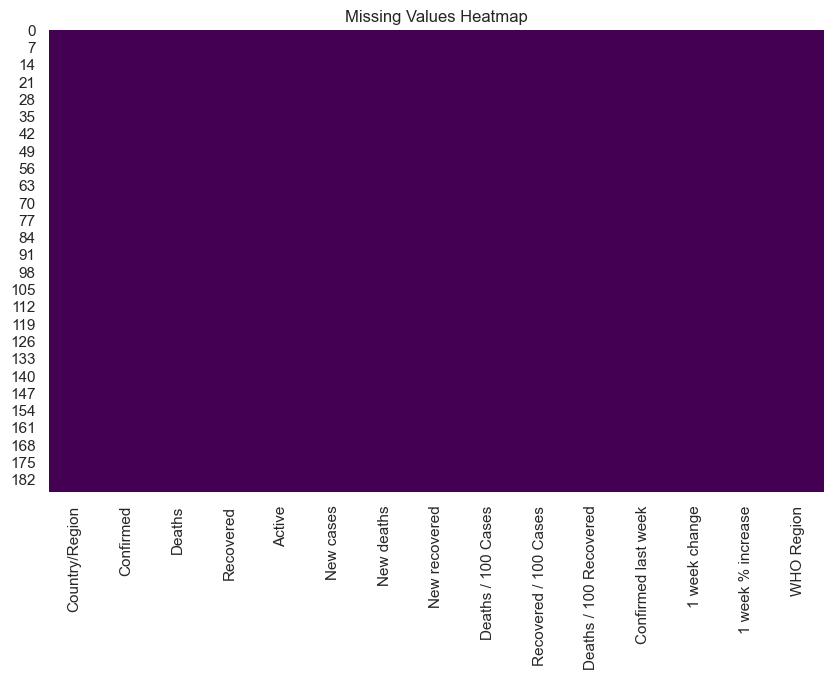

In [36]:
sns.heatmap(dataframe.isnull(), cbar=False, cmap="viridis")
plt.title('Missing Values Heatmap')
plt.show()

In [33]:
print("Duplicate Rows:", dataframe.duplicated().sum())

Duplicate Rows: 0


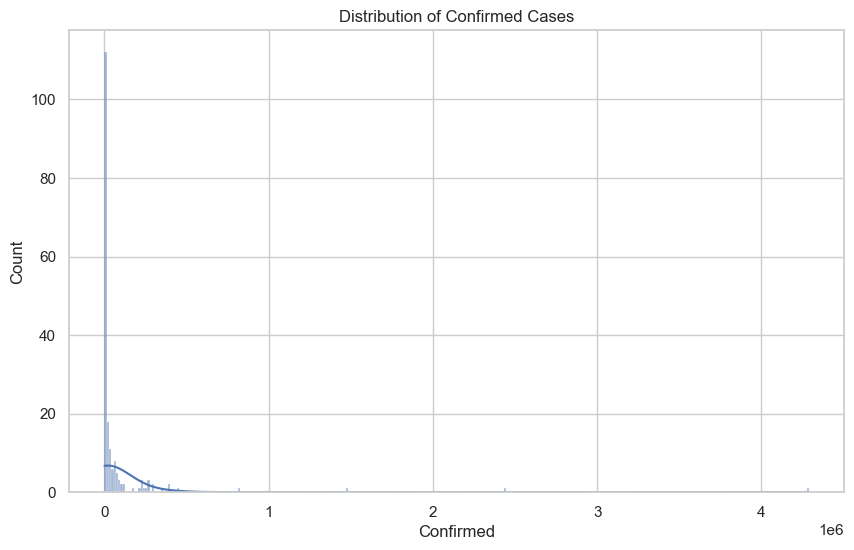

In [13]:
#univariate Analysis
sns.histplot(dataframe['Confirmed'], kde=True)
plt.title("Distribution of Confirmed Cases")
plt.show()

In [14]:
print("Unique countries:", dataframe['Country/Region'].nunique())

Unique countries: 187


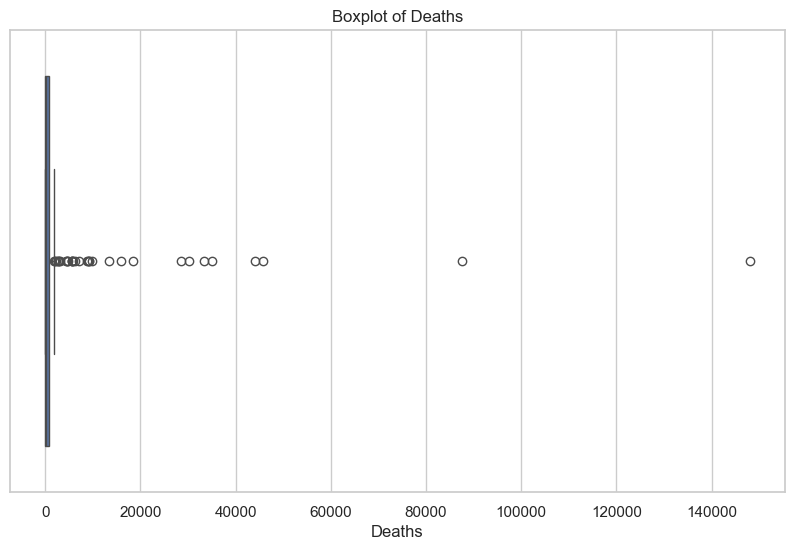

In [16]:
#Box plot is used to detect outlier
sns.boxplot(x=dataframe['Deaths'])
plt.title("Boxplot of Deaths")
plt.show()

In [27]:
dataframe['Deaths'].value_counts()

Deaths
0      17
11      4
2       3
7       3
8       3
       ..
146     1
78      1
483     1
140     1
36      1
Name: count, Length: 150, dtype: int64

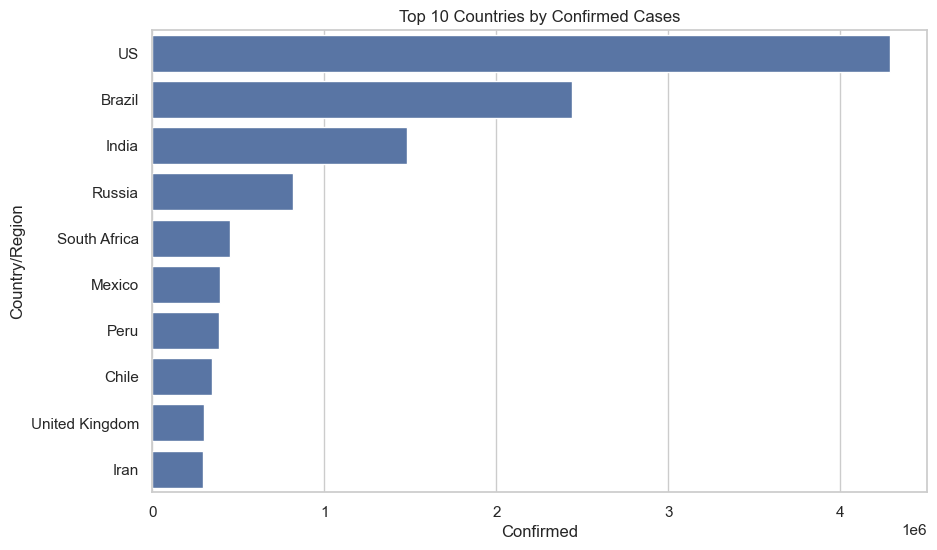

In [17]:
top_confirmed = dataframe.sort_values(by='Confirmed', ascending=False).head(10)
sns.barplot(x='Confirmed', y='Country/Region', data=top_confirmed)
plt.title("Top 10 Countries by Confirmed Cases")
plt.show()

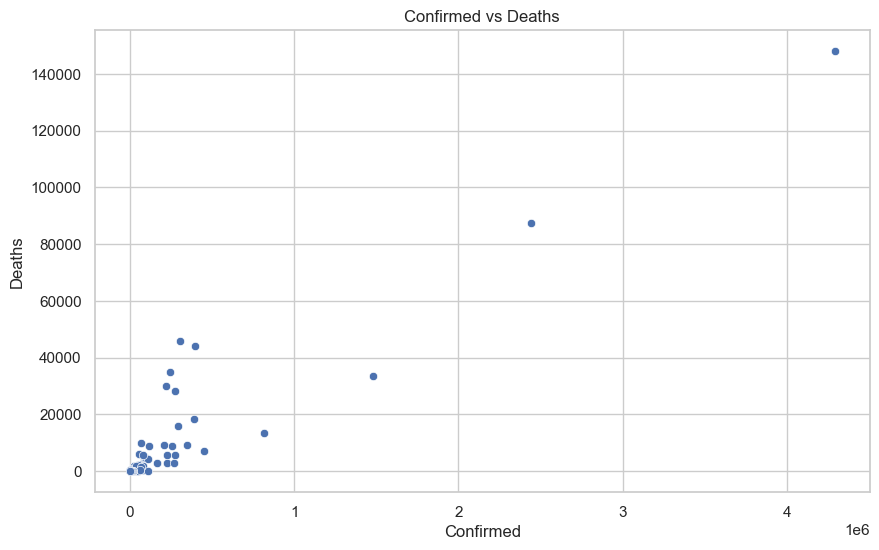

In [18]:
#bivariate analysis
sns.scatterplot(data=dataframe, x='Confirmed', y='Deaths')
plt.title("Confirmed vs Deaths")
plt.show()

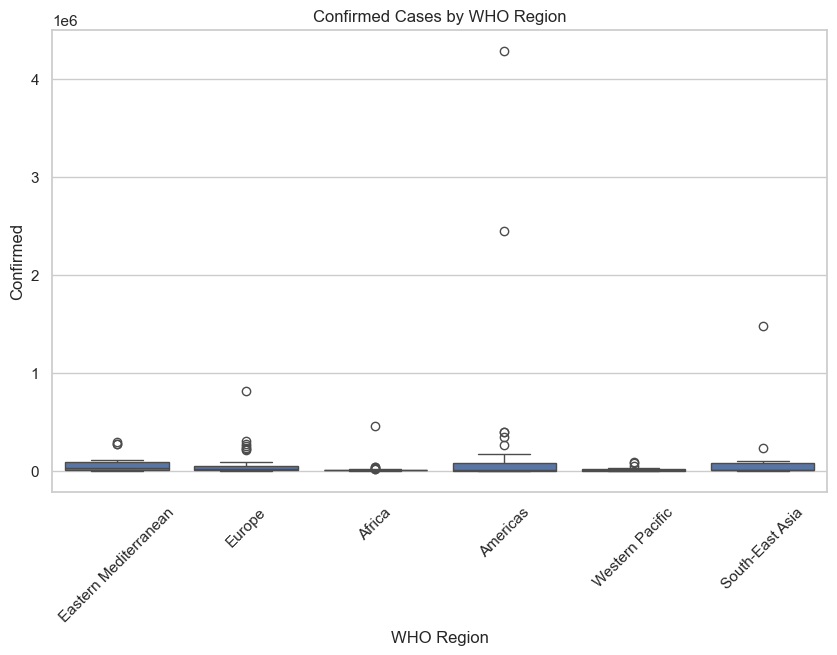

In [24]:
sns.boxplot(x='WHO Region', y='Confirmed', data=dataframe)
plt.xticks(rotation=45)
plt.title("Confirmed Cases by WHO Region")
plt.show()


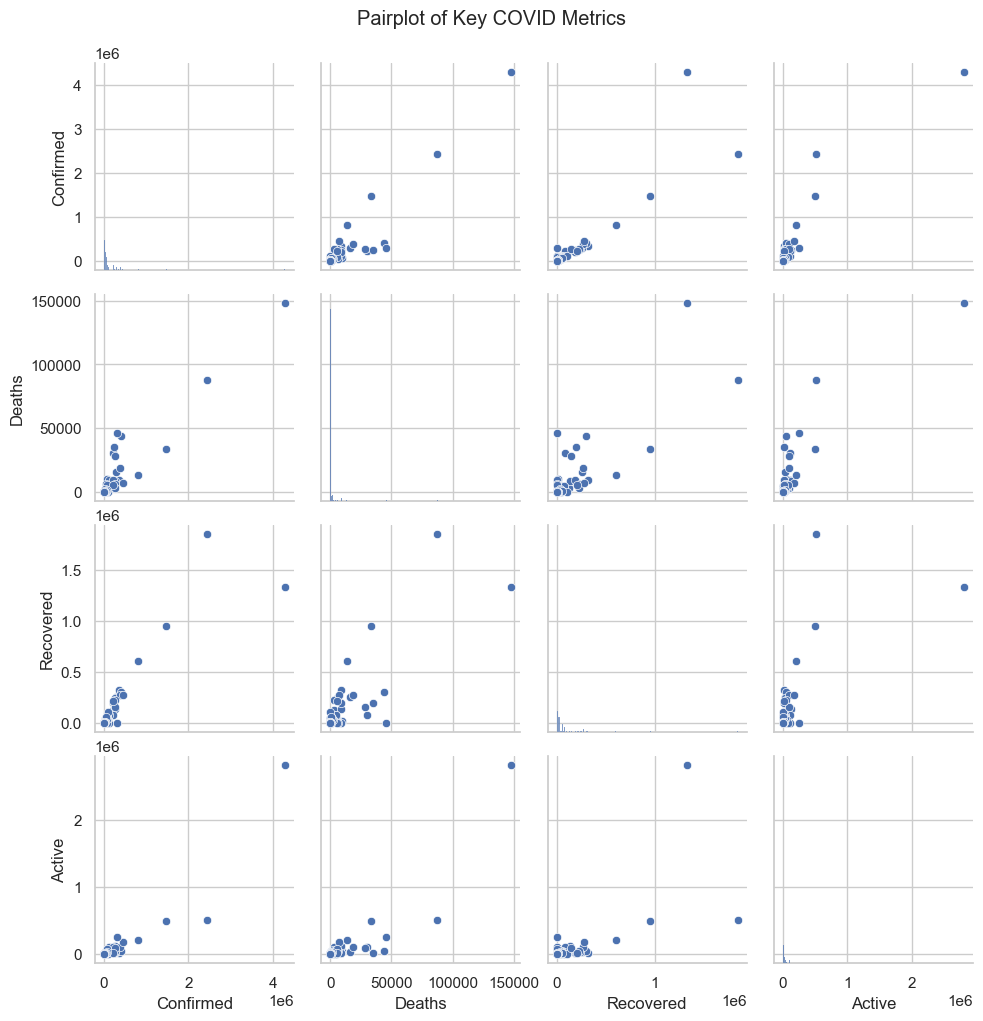

In [25]:
#multivariate analysis
sns.pairplot(dataframe[['Confirmed', 'Deaths', 'Recovered', 'Active']])
plt.suptitle("Pairplot of Key COVID Metrics", y=1.02)
plt.show()

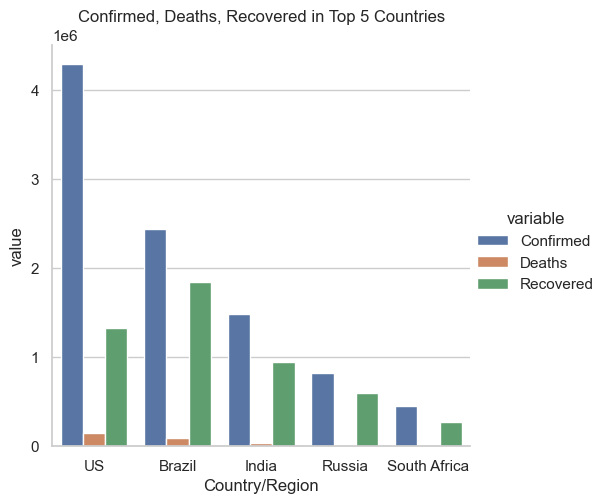

In [26]:
top5 = dataframe.sort_values(by='Confirmed', ascending=False).head(5)
top5_melted = top5.melt(id_vars='Country/Region', value_vars=['Confirmed', 'Deaths', 'Recovered'])
sns.catplot(data=top5_melted, x='Country/Region', y='value', hue='variable', kind='bar')
plt.title("Confirmed, Deaths, Recovered in Top 5 Countries")
plt.show()

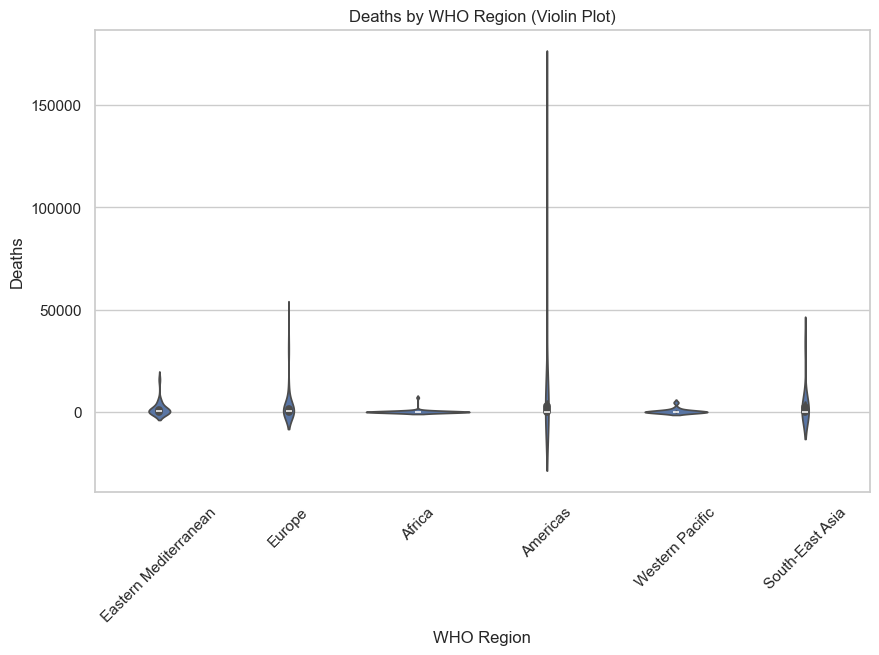

In [30]:
sns.violinplot(x='WHO Region', y='Deaths', data=dataframe)
plt.xticks(rotation=45)
plt.title("Deaths by WHO Region (Violin Plot)")
plt.show()

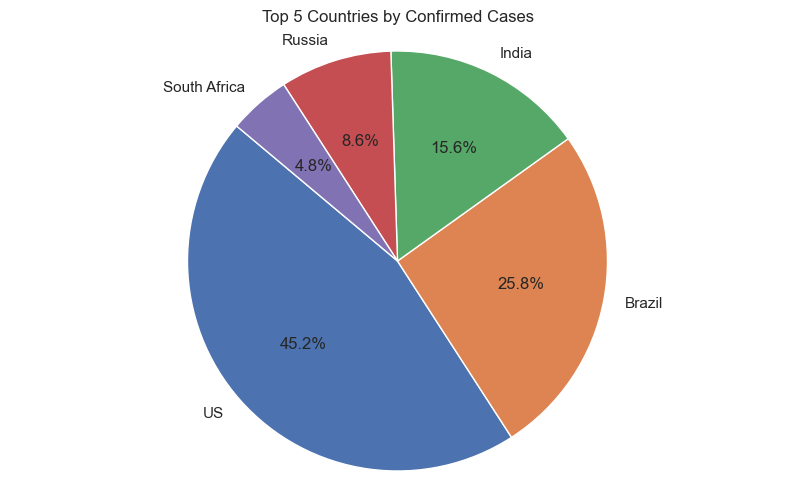

In [31]:
top5 = dataframe.sort_values(by='Confirmed', ascending=False).head(5)
plt.pie(top5['Confirmed'], labels=top5['Country/Region'], autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Countries by Confirmed Cases")
plt.axis('equal')
plt.show()